# Bank Marketing Campaign

## Business Problem Understanding

**1. Context**

The realm of banking encompasses everything related to banks, including their institutions, business activities, and the methods and processes involved in conducting their operations. In this context, "bank" refers to an entity that gathers funds from the public in the form of deposits and channels them to the public in the form of credit and other forms, aiming to improve the well-being of the general population. One of the strategies employed by banks to gather assets and liabilities is through deposit programs.

A deposit is a type of savings where withdrawals can only be made at specific times based on an agreement between the Depositor and the Bank. This deposit program involves a practice where funds gathered from the first set of customers are withheld for a specific period. These funds are then lent or credited to a second set of customers with an additional specified interest rate. After the agreement period expires, the funds are returned to the first set of customers with a specified interest rate. This practice is commonly known as "Spread based income," indicating the profit gained by banks through the process of fund gathering and distribution.

However, attracting potential depositors is not an easy task. It requires efforts to stimulate potential customers by highlighting the benefits they can gain by entrusting their funds to the bank. In addition to creating attractive programs, banks also need to establish effective marketing strategies to promote their deposit programs to potential customers.

Identifying potential depositors is also a challenge as not all potential customers are interested in making deposits. Targeting all bank customers through marketing efforts could lead to high costs, and there's no guarantee that all those targeted would be interested in deposits. Typically, only potential customers with sufficient funds, strong cash flows, and genuine interest would invest in deposits. This implies that while the cost might be significant, the conversion rate might not necessarily be high. Hence, banks need to strategically target potential customers to optimize marketing costs and maintain a consistently high conversion rate.


**2. Problem Statement**


**Problem Statement for Analytics**

What are the specific customer characteristics that should be included in the target marketing campaign for the deposit program to increase the volume of deposited assets?

**Problem Statement for Machine Learning**

How can we predict the likelihood of a customer making a deposit? This prediction is crucial to ensure that the bank's deposit campaign targets the right audience effectively.

The application of machine learning methods is essential to facilitate predictions, offer more quantifiable insights, and provide recommendations.


**3. Goals**

The goal is for the bank to identify the ideal customer characteristics for targeted marketing strategies and to predict the likelihood of a client making a deposit. This approach aims to make the bank's marketing efforts more efficient and precise, ultimately boosting revenue.


**4. Analytical Approach**

Our approach involves analyzing data to identify potential depositor groups and constructing a classification model. This model will aid the bank in predicting the probability that a customer will make a deposit.


**5. Metrics**

   1. Accuracy: in this context would measure the overall correctness of the model's predictions. It tells us how often the model correctly predicts both customers who will and will not make a deposit. However, if the dataset has imbalanced classes (more of one class than the other), high accuracy might be misleading as the model could simply predict the majority class.

   2. Recall: would be crucial to capture as many customers who will make a deposit as possible. A high recall means the model identifies most of the actual positive cases (customers who will make a deposit), which is essential to avoid missing out on potential revenue.

   3. Precision: is important to ensure that when the model predicts a customer will make a deposit, it's highly likely to be correct. A high precision indicates that customers predicted to make a deposit are more likely to actually do so, minimizing false positives.

   4. F1-Score: is a combination of Precision and Recall. It's useful when we need to strike a balance between identifying as many positive cases as possible (Recall) while ensuring that those predictions are accurate (Precision). It helps to assess the overall effectiveness of the model.

   5. ROC-AUC Curve: is a graphical representation of the trade-off between Sensitivity (Recall) and Specificity (1 - False Positive Rate). A model with a high ROC-AUC value indicates that it's effective in distinguishing between customers who will and will not make a deposit.

In summary, for this classification task, we want to maximize Recall to capture as many potential depositors as possible, while maintaining a reasonable level of Precision to avoid wasting resources on customers who are unlikely to make a deposit. The F1-Score provides a balanced view, and the ROC-AUC Curve gives insights into the overall discriminatory power of the model.

## Data Understanding

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| age | Numerical | Age of a client |
| job | Categorical | Type of job |
| marital | Categorical | Marital status of a client|
| education | Categorical | Education level of a client |
| default | Categorical | Condition of a client if having credit in default |
| housing | Categorical | Condition of a client if having housing loan |
| loan | Categorical | Condition of a client if having personal loan |
| contact | Categorical | Contact communication type |
| month | Categorical | Last contact month of year |
| day_of_week | Categorical | Last contact day of the week |
| duration | Numerical | Last contact duration, in seconds |
| campaign | Numerical | Number of contacts performed during this campaign and for this client (includes last contact) |
| pdays | Numerical | Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)|
| previous | Numerical | Number of contacts performed before this campaign and for this client |
| poutcome | Categorical | Outcome of the previous marketing campaign |
| emp.var.rate | Numerical | Employment variation rate - quarterly indicator |
| cons.price.idx | Numerical | Consumer price index - monthly indicator |
| cons.conf.idx | Numerical | Consumer confidence index - monthly indicator |
| euribor3m | Numerical | Euribor 3 month rate - daily indicator  |
| nr.employed | Numerical | Number of employees - quarterly indicator |
| y | Binary | 0 – Not subscribed a deposit, 1 – subscribed a deposit |

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
data = r'bank-additional-full.csv'
df = pd.read_csv(data, sep=';', header=0, na_values='.')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Exploratory Data Analysis

Before getting into the analysis, we need to explore our dataset further in the Exploratory Data Analysis stage. From this process, we will know the type of data in the columns of the dataset, unique values owned by categorical columns, the presence of missing values, outliers, duplicate data, and find out whether this dataset is imbalanced or not.

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In general, we can see that:
* the bank-additional-full dataset has 21 columns and 41,188 rows
* the bank-additional-full dataset has 10 columns of numeric type and 11 columns of categorical type

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* From the descriptive statistics, the youngest customer is 17 years old and the oldest is 98 years old. The age range of customers does not show any anomalies.
* The longest duration of contacting customers is at 4918 seconds or 1.3 hours which is still reasonable and not an anomaly.
* The number of days that have passed since the client was last contacted from the previous campaign is not 999 days at most, but based on data understanding the number 999 here means that the client was not contacted before.

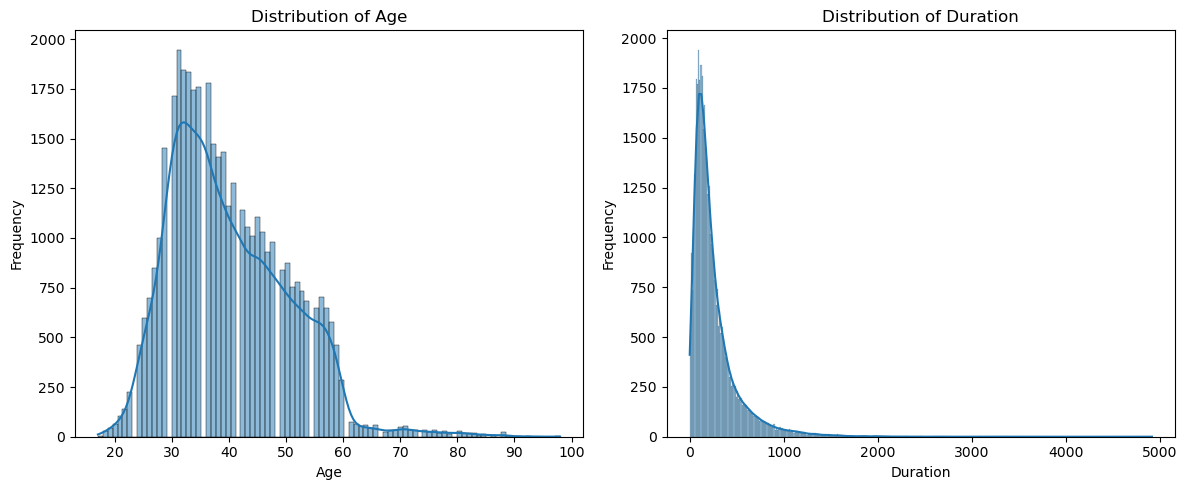

In [8]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Distribution plot for 'Age'
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'Duration'
sns.histplot(df['duration'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Duration')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Previously, it has been checked that the continuous numerical data features only exist in the `age`, and `duration` features. From the subplot above, both have a right-skewed distribution, so the central tendency used for analysis is the median.

In [9]:
df['age'].median()

38.0

In [10]:
df['duration'].median()

180.0

In this dataset, the dominant customer is 38 years old, and the most common customer contact duration is at 180 seconds or 3 minutes.

#### Data Distribution Plot

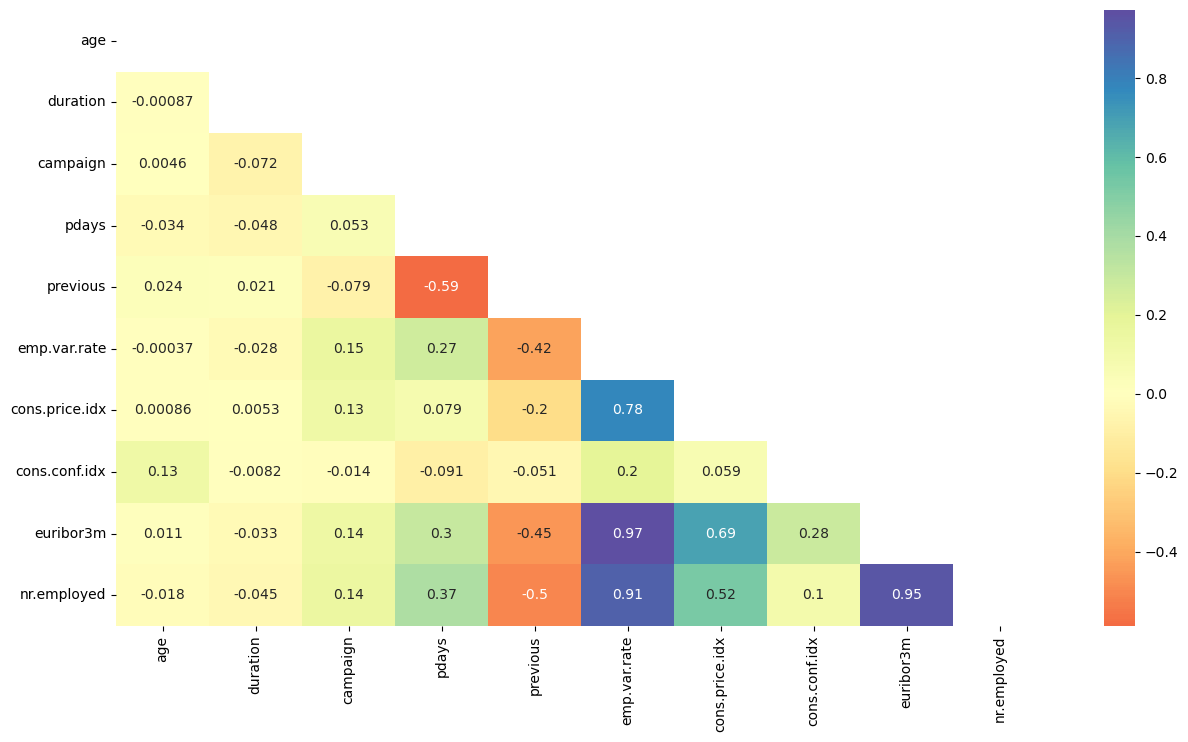

In [11]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(15,8))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

Pearson correlation is used to evaluate the linear relationship between numeric columns. Pearson correlation shows that there is a positive relationship between the features `emp.var.rate` and `euribor3m`, `nr.employed` and `euribor3m`, and `nr.employed` and `emp.var.rate`, meaning that if the value of one variable increases, it is likely that the other variable will also increase. This illustrates that as the percentage change in the number of workers increases, the interbank interest rate in the Euro financial market and the number of employees working in a period also increases.

#### Data Cardinalities

In [12]:
list_attribute = []
for cols in df.columns :
    list_attribute.append([cols, df[cols].dtype, df[cols].isna().sum(), round((df[cols].isna().sum()/len(df[cols])) * 100,2),
                    df[cols].nunique(), list(df[cols].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['attribute', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=list_attribute)
df_desc

,attribute,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[62, 22]"
1,job,object,0,0.0,12,"[retired, housemaid]"
2,marital,object,0,0.0,4,"[unknown, single]"
3,education,object,0,0.0,8,"[basic.4y, high.school]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[unknown, no]"
6,loan,object,0,0.0,3,"[yes, unknown]"
7,contact,object,0,0.0,2,"[cellular, telephone]"
8,month,object,0,0.0,10,"[may, apr]"
9,day_of_week,object,0,0.0,5,"[wed, fri]"


* Some columns, namely, `job`, `marital`, `education`, and `default`, have data with unique value 'unknown'. It could be that customers do not provide information about their data in some categorical fields. We will check in more detail which column has unique value 'unknown'.

In [13]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


#### Missing Value Identification

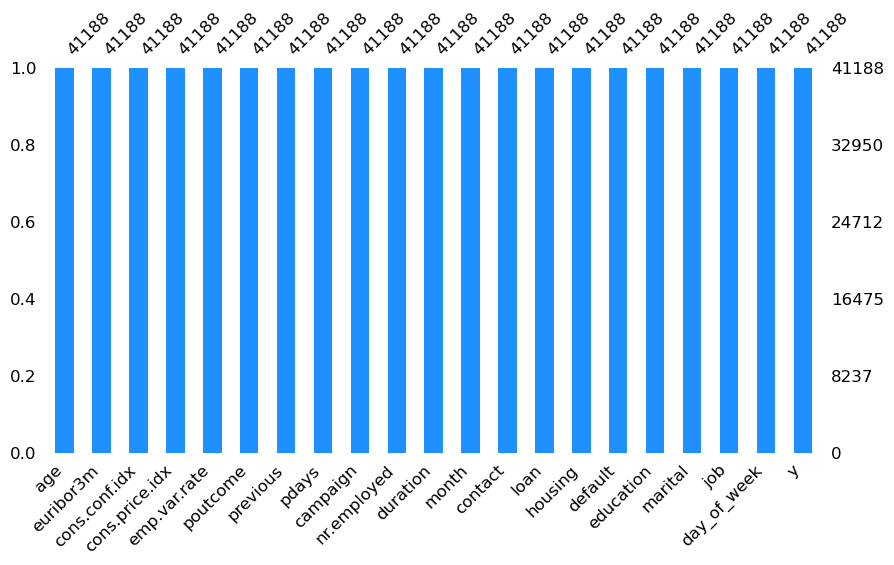

In [14]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

There is no missing data found in all features, but the presence of unique values in the form of 'unknown' in each feature needs further handling.

<Axes: >

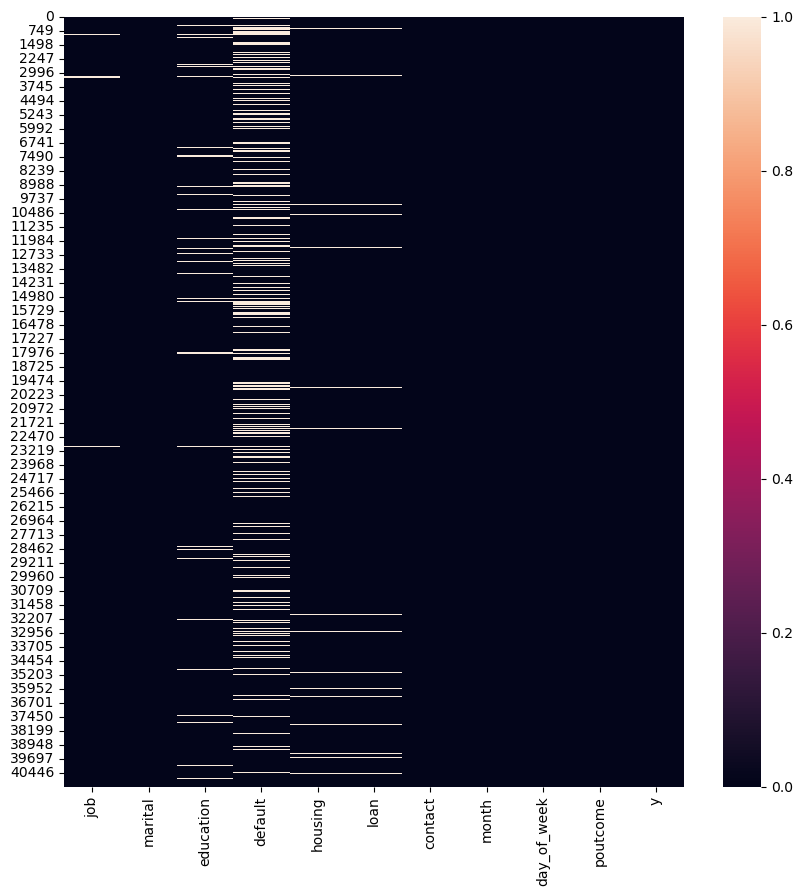

In [15]:
# Distribution of unknown value 
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='object').apply(lambda x: (x == 'unknown')))

In [16]:
unknown_counts = df.select_dtypes(include='object').apply(lambda x: (x == 'unknown').sum())
unknown_counts

job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

In [17]:
unknown_counts.sum()

12718

In [18]:
unknown_percentages = (unknown_counts / df.shape[0]) * 100
print("Percentage of unknown unique values in the dataset:")
print(unknown_percentages)

Percentage of unknown unique values in the dataset:
job             0.801204
marital         0.194231
education       4.202680
default        20.872584
housing         2.403613
loan            2.403613
contact         0.000000
month           0.000000
day_of_week     0.000000
poutcome        0.000000
y               0.000000
dtype: float64


From the percentage of 'unknown' value distribution, the `default` feature has a significant percentage because it is above 20%, while the distribution of 'unknown' value in other categorical features is quite low because it is below 5%. From these findings, the 'unknown' value for `job`, `marital`, `education`, `housing`, and `loan` features will be substituted using the unique value based on the mode of the feature. While the existence of unique value in `default` feature will be retained and replaced with 'not_available', it is possible that many customers do not disclose their condition whether they defaulted or not. Treatment for data that has a unique value of 'unknown' will be done in the preprocessing stage.

#### Outlier Identification

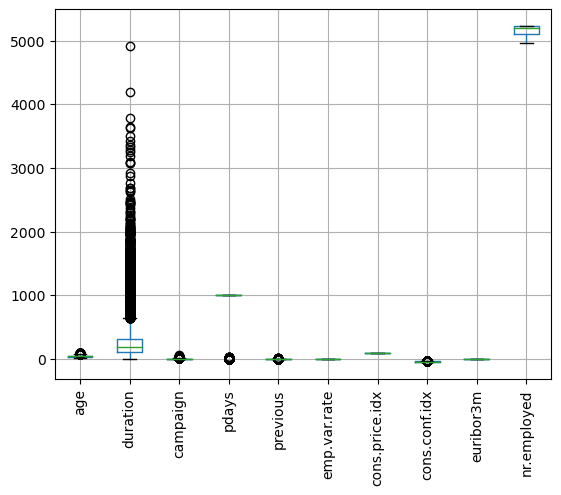

In [19]:
df.boxplot(rot=90);

In [20]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

for i in numerical_cols:
    if i == 'deposit':
        continue

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))
    print(f"Number of outliers in column {i}: {len(df[i].loc[outliers])}")

Number of outliers in column age: 469
Number of outliers in column duration: 2963
Number of outliers in column campaign: 2406
Number of outliers in column pdays: 1515
Number of outliers in column previous: 5625
Number of outliers in column emp.var.rate: 0
Number of outliers in column cons.price.idx: 0
Number of outliers in column cons.conf.idx: 447
Number of outliers in column euribor3m: 0
Number of outliers in column nr.employed: 0


The presence of outliers in the feature column will be a consideration for the selection of scaling methods in machine learning modeling.

#### Duplicate Data Identification

In [21]:
df.duplicated().sum()

12

There are 12 duplicate data, the existence of duplicate data will be eliminated in the preprocessing stage.

#### Imbalance Data Recognition

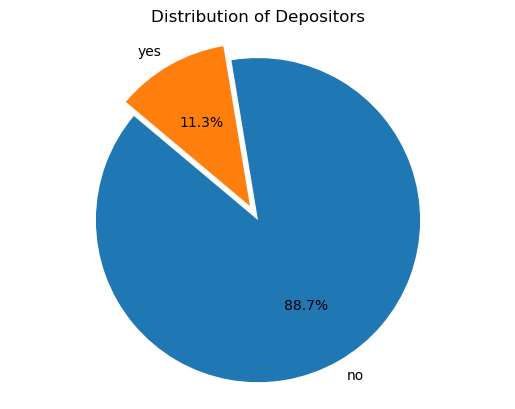

In [22]:
# Count the values in the 'y' column
value_counts = df['y'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, explode = [0.1, 0])
plt.title('Distribution of Depositors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

This dataset has imbalance dataset characteristics, because the label is dominated by one of the unique values, in column of the target, the proportion of unique value 'no' is very high compared to unique value 'yes'. In the machine learning stage, a treatment will be applied to overcome the imbalance problem in the dataset.

# Preprocessing Data Analytics

#### Grouping and Binning

Some numeric features such as `age`, `campaign`, and `pdays` will each be made to serve as new categorical features. This is done because these numerical features have a range of values which can be classified into groups. For example in the `age` feature, it will be classified into five groups namely for ages <26, 26-40, 41-55, 56-70, and >70, with consideration of work experience. Age below 26 is made for customers who are still in college, fresh graduates, and people who are still starting their careers. The 26-40 age group is made for customers who already have work experience, as well as for the 41-55 and 56-70 age ranges who have more work experience, and age 70 and above who are most likely retired.

In [23]:
ag = [df]
age_groups = ['<26', '26-40', '41-55', '56-70', '>70']

for column in ag:
    column.loc[column["age"] < 26,  'age_group'] = '<26'
    column.loc[(column["age"] >= 26) & (column["age"] <= 40), 'age_group'] = '26-40'
    column.loc[(column["age"] >= 41) & (column["age"] <= 55), 'age_group'] = '41-55'
    column.loc[(column["age"] >= 56) & (column["age"] <= 70), 'age_group'] = '56-70'
    column.loc[column["age"] > 70, 'age_group'] = '>70'

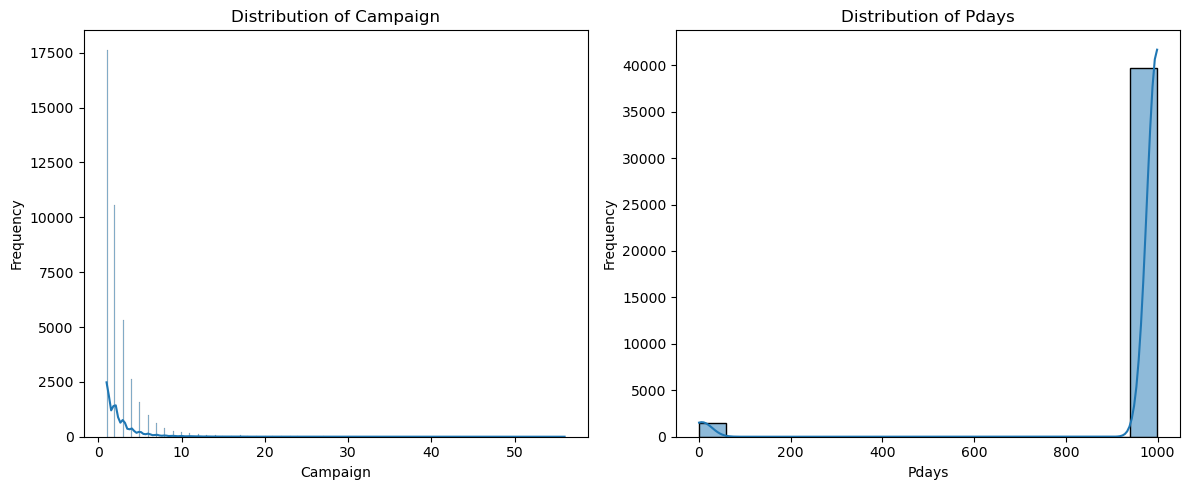

In [24]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Distribution plot for 'campaign'
sns.histplot(df['campaign'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Campaign')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'pdays'
sns.histplot(df['pdays'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Pdays')
axes[1].set_xlabel('Pdays')
axes[1].set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In the `campaign` feature, it will be classified into 6 groups with an interval of 10, but for the campaign group below 10, it will be binned with an interval of 5, because the campaign group below 10 has a relatively high data distribution if it is made with an interval of 10, breaking the campaign group below 10 into two groups with an interval of 5 has an impact on improving the machine learning model.

In [25]:
campaign_groups = ['1-4','5-10' ,'11-20', '21-30', '31-40', '>40']
df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 5, 10, 20, 30, 40, np.inf], labels=campaign_groups, right=False)

In the `pdays` feature, which represents the time interval of days from the last contact during the previous marketing campaign, it is classified into seven groups based on the day interval, while binning for a value of 999 is added to represent clients who have no time interval because they were never contacted before. From the distribution plot, it can be seen that the majority of the data is worth 999.

In [26]:
pdays_groups = ['0', '>=5', '>=10', '>=15', '>=20', '>=25', '999 (Not Previously Contacted)']
df['pdays_group'] = pd.cut(df['pdays'], bins=[0, 5, 10, 15, 20, 25, 999, np.inf], labels=pdays_groups, right=False)

In [27]:
data_drop = ['campaign','pdays']
df = df.drop(data_drop, axis=1)

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,campaign_group,pdays_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56-70,1-4,999 (Not Previously Contacted)
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56-70,1-4,999 (Not Previously Contacted)
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,26-40,1-4,999 (Not Previously Contacted)
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,26-40,1-4,999 (Not Previously Contacted)
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56-70,1-4,999 (Not Previously Contacted)


#### Filling Unknown Unique Value

In [29]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

If the unique value 'unknown' in the `default` feature is replaced based on the mode value of this feature which is the value 'no', then the proportion of value 'no' will increase, whereas there could be customers who actually default on their loans but prefer not to disclose it. Therefore the unique value 'unknown' in the `default` feature will not be replaced based on the mode value of the feature. At this stage the 'unknown' value will be considered as the unavailability of information from the customer, which may be due to the customer not disclosing the condition whether they are in default or not, so it will be renamed to 'not_available'.  

In [30]:
df['default'] = df['default'].replace('unknown', 'not_available')

In [31]:
df['default'].value_counts()

no               32588
not_available     8597
yes                  3
Name: default, dtype: int64

In [32]:
categoric_df = df.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,job,12,"[housemaid, services, admin., blue-collar, tec..."
1,marital,4,"[married, single, divorced, unknown]"
2,education,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
3,default,3,"[no, not_available, yes]"
4,housing,3,"[no, yes, unknown]"
5,loan,3,"[no, yes, unknown]"
6,contact,2,"[telephone, cellular]"
7,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
8,day_of_week,5,"[mon, tue, wed, thu, fri]"
9,poutcome,3,"[nonexistent, failure, success]"


Before replacing the unique value 'unknown' with the mode of the features concerned, for the unique values in the `education` feature, the stratification of the education strata will be made first.

In [33]:
df['education'] = df['education'].map({
    'university.degree': 'university_degree',
    'professional.course': 'professional_certificate',
    'high.school': 'secondary_school',
    'basic.9y': 'secondary_school',
    'basic.6y': 'primary_school',
    'basic.4y': 'primary_school',
    'unknown': 'unknown',
    'illiterate': 'no_school'
})

In [34]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In the `poutcome` feature, the dominant unique value is 'nonexistent' where the output of the previous marketing is unknown. To make it clearer, the unique value 'nonexistent' will be changed to 'undetermined' for information from previous marketing results that cannot be determined.

In [35]:
df['poutcome'] = df['poutcome'].replace('nonexistent', 'undetermined')

At this stage, the 'unknown' value of each feature whose percentage is below 5% will be replaced with the mode of the unique value of the feature concerned.

In [36]:
unknown_features = ['job', 'marital', 'education','housing', 'loan']

for feature in unknown_features:
    mode_value = df[feature].mode()[0]  
    df[feature] = df[feature].replace('unknown', mode_value)  

In [37]:
unknown_counts = df.select_dtypes(include='object').apply(lambda x: (x == 'unknown').sum())
unknown_counts

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
age_group      0
dtype: int64

Through this process, the data now has no unknown values.

#### Removing Data Duplication

It is necessary to identify the existence of duplicate data again because there is a possibility that changing the unique value 'unknown' to unique value mode will provide new duplicate data, and then eliminate it.

In [38]:
df.duplicated().sum()

18

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Data Cardinalities Manipulation

In [40]:
categoric_df = df.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,job,11,"[housemaid, services, admin., blue-collar, tec..."
1,marital,3,"[married, single, divorced]"
2,education,5,"[primary_school, secondary_school, professiona..."
3,default,3,"[no, not_available, yes]"
4,housing,2,"[no, yes]"
5,loan,2,"[no, yes]"
6,contact,2,"[telephone, cellular]"
7,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
8,day_of_week,5,"[mon, tue, wed, thu, fri]"
9,poutcome,3,"[undetermined, failure, success]"


In [41]:
categoric_df = df.select_dtypes(include="category")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,campaign_group,6,"['1-4', '5-10', '11-20', '21-30', '>40', '31-4..."
1,pdays_group,7,"['999 (Not Previously Contacted)', '>=5', '0',..."


In [42]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [43]:
df['education'].unique()

array(['primary_school', 'secondary_school', 'professional_certificate',
       'university_degree', 'no_school'], dtype=object)

In [44]:
#Coding for ordering education features that will be used for analytics and plotting needs
education_order = ['no_school', 'primary_school','secondary_school', 'university_degree', 'professional_certificate']

In [45]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [46]:
df['month'] = df['month'].map({
    'may': 'may',
    'jun': 'june',
    'jul': 'july',
    'aug': 'august',
    'oct': 'october',
    'nov': 'november',
    'dec': 'december',
    'mar': 'march',
    'apr': 'april',
    'sep': 'september'
})

In [47]:
#Coding for ordering month features that will be used for analytics and plotting needs
month_order = ['march', 'april','may', 'june', 'july', 'august','september', 'october', 'november', 'december']

In [48]:
df['day_of_week'] = df['day_of_week'].map({
    'thu': 'thursday',
    'mon': 'monday',
    'wed': 'wednesday',
    'tue': 'tuesday',
    'fri': 'friday'
})

In [49]:
#Coding for ordering day_of_week features that will be used for analytics and plotting needs
day_order = ['monday', 'tuesday','wednesday', 'thursday', 'friday']

#### Unique Value Counts on Categorical Features

In [50]:
df['age_group'].value_counts()

26-40    22091
41-55    13833
56-70     3160
<26       1665
>70        421
Name: age_group, dtype: int64

In [51]:
df['campaign_group'].value_counts()

1-4      36186
5-10      3890
11-20      907
21-30      147
31-40       32
>40          8
Name: campaign_group, dtype: int64

In [52]:
df['pdays_group'].value_counts()

999 (Not Previously Contacted)    39655
0                                   659
>=5                                 600
>=10                                194
>=15                                 53
>=20                                  6
>=25                                  3
Name: pdays_group, dtype: int64

In [53]:
df['job'].value_counts()

admin.           10749
blue-collar       9250
technician        6737
services          3966
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [54]:
df['marital'].value_counts()

married     24997
single      11563
divorced     4610
Name: marital, dtype: int64

In [55]:
df['education'].value_counts().reindex(education_order)

no_school                      18
primary_school               6465
secondary_school            17285
university_degree           12164
professional_certificate     5238
Name: education, dtype: int64

In [56]:
df['default'].value_counts()

no               32571
not_available     8596
yes                  3
Name: default, dtype: int64

The 'unknown' data is retained and changed to 'not_available' because if filled in with the mode of the unique value, it will produce results that are not necessarily the same as the actual condition and the effect of this can be very influential because the number of no and yes numbers is very different.

In [57]:
df['housing'].value_counts()

yes    22558
no     18612
Name: housing, dtype: int64

In [58]:
df['loan'].value_counts()

no     34922
yes     6248
Name: loan, dtype: int64

In [59]:
df['contact'].value_counts()

cellular     26129
telephone    15041
Name: contact, dtype: int64

In [60]:
df['month'].value_counts().reindex(month_order)

march          546
april         2630
may          13764
june          5318
july          7169
august        6174
september      570
october        717
november      4100
december       182
Name: month, dtype: int64

In [61]:
df['day_of_week'].value_counts().reindex(day_order)

monday       8511
tuesday      8085
wednesday    8131
thursday     8617
friday       7826
Name: day_of_week, dtype: int64

In [62]:
df['poutcome'].value_counts()

undetermined    35545
failure          4252
success          1373
Name: poutcome, dtype: int64

With respect to categorical type data that needs to be encoded in the machine learning process, from the information above it can be concluded that the `job` feature will be applied binary encoder because it has relatively many categories, While for features with relatively few categories and do not have an ordinal or sequential relationship, one hot encoding will be applied, such as the features `education`,`marital`, `housing`, `loan`, `contact`, `default`, `poutcome`, `month`, `day_of_week`, `age_group`, `campaign_group`, and `days_group`. The `age_group` feature will not be used because it is already represented with the numeric `age` feature.

# Data Analytics

In data analysis, we analyze customer characteristics using categorical features such as `age_group`, `job`, `education`, `marital`, `housing`, `loan`, and `default`, while analysis for marketing treatment using `campaign_group`, `previous`, `days_group`, `contact`, and also including time-representing features such as `month` and `day_of_week` will be analyzed in the marketing treatment section, and will additionally discuss statistics from previous marketing campaign results using the `poutcome` feature.

Features that are external factors such as `duration`, `emp.var.rate`,`cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed` which are not personal characteristics of customers will not be used for data analysis, but still included in machine learning process to support finding patterns in the data. However, external factors will be not considered in the feature importances if these features have significant value, because external factors that influence customers to deposit cannot be anticipated in making marketing strategies. `duration` is considered an external factor because telemarketers from banks cannot regulate the duration of contact made with potential customers. 

### Customer Personal Characteristics

#### Age

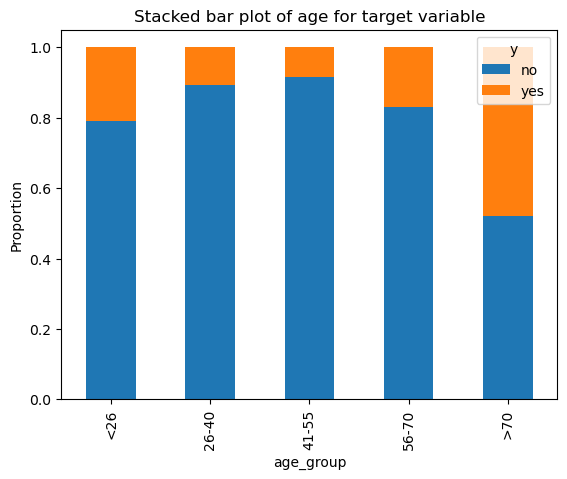

In [63]:
# Calculate the proportions for each category
prop_df_age = df.groupby(['age_group', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reorder the columns based on the age groups
prop_df_age = prop_df_age.reindex(age_groups)

# Plot the stacked barcode plot
prop_df_age.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of age for target variable')
plt.xlabel('age_group')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__  
* The proportion of customers with deposits tends to be dominated by customers aged above 70 years followed by groups of customers who are still under 26 years old. This may indicate that the bank tends to be a favorite for customers who are still starting their careers or those who are retired.   
* This may be related to the fact that customers below the age of 26 may feel safe to lock up their funds for a certain period of time to earn higher interest rates. Meanwhile, customers above the age of 70 may have more stable finances and have accumulated sufficient savings. They may be looking for investment options that are safer and still provide income, such as time deposits.

#### Job

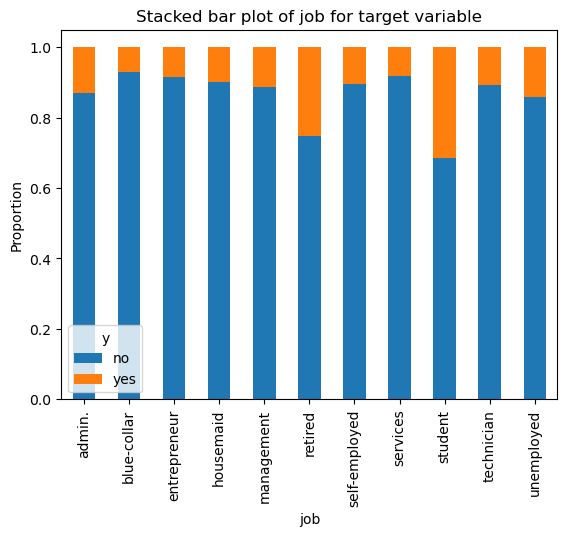

In [64]:
# Calculate the proportions for each category
prop_df_job = df.groupby(['job', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the stacked bar plot
prop_df_job.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of job for target variable')
plt.xlabel('job')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__  
* From the type of job, the dominant customers with deposits are those who are still students and are retired, this is in line with the results of the age group observations.

#### Education

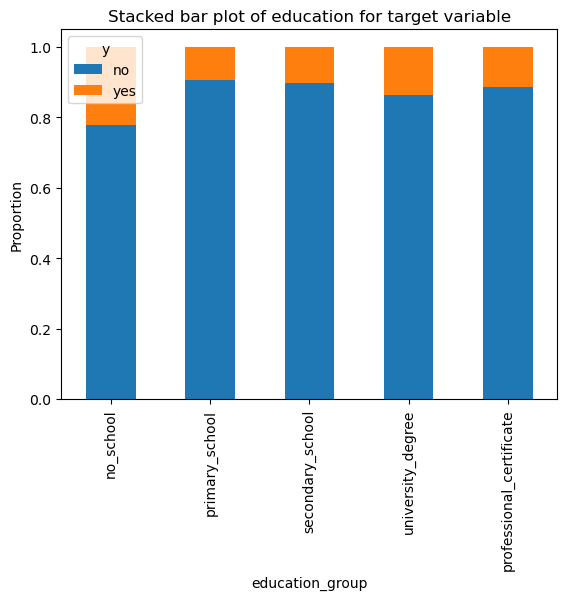

In [65]:
# Calculate the proportions for each category
prop_df_education = df.groupby(['education', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reorder the columns based on the education groups
prop_df_education = prop_df_education.reindex(education_order)

# Plot the stacked barcode plot
prop_df_education.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of education for target variable')
plt.xlabel('education_group')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__  
* When examined based on the level of education, it turns out that customers who have no study certificate tend to be dominant in making deposits.

#### Marital Status, Housing, Loan, and Default

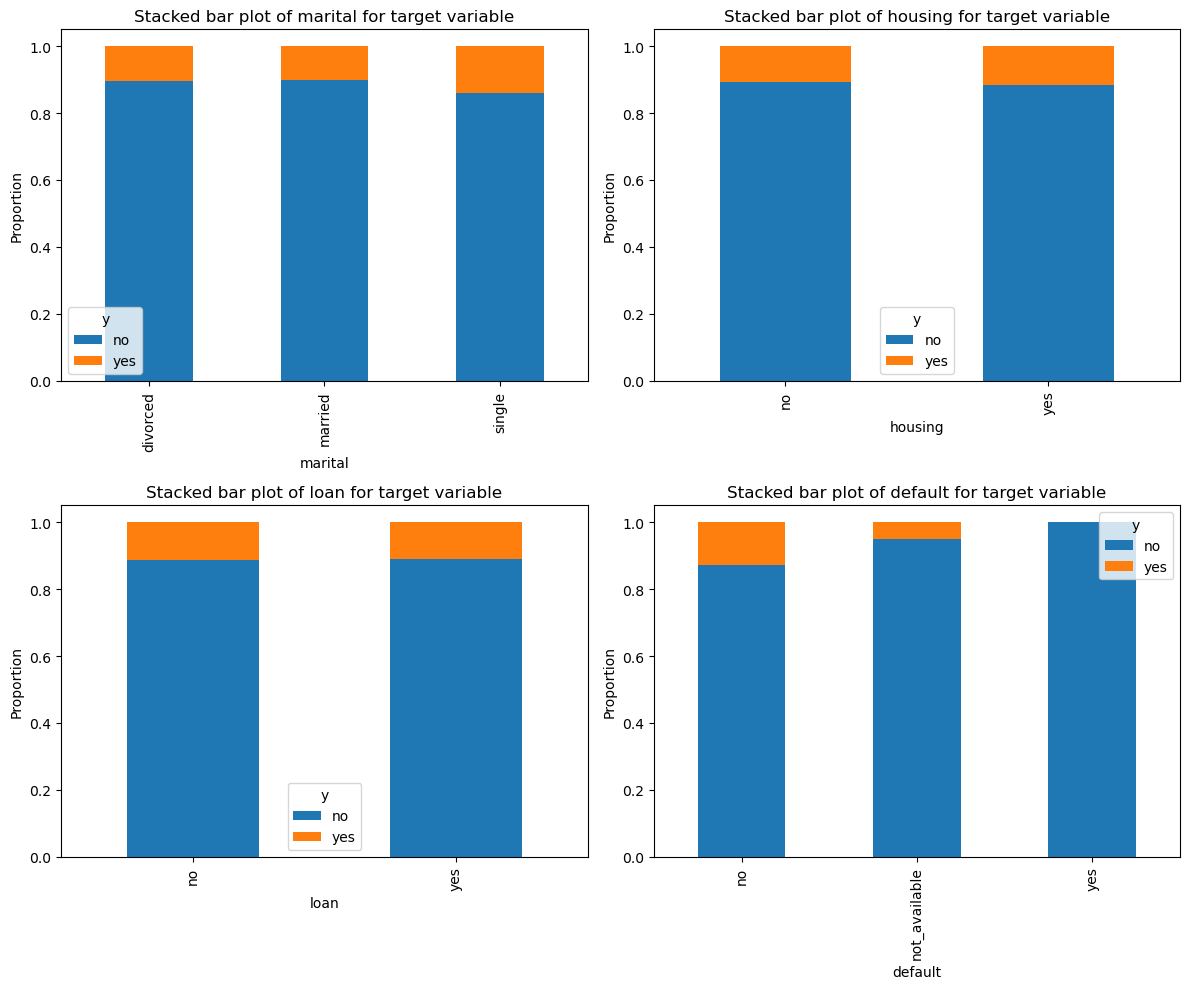

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# List of categorical features
marital_house_loan_default = ['marital', 'housing', 'loan', 'default']

# Plot stacked bar plots for each categorical feature
for i, feature in enumerate(marital_house_loan_default):
    prop_df = df.groupby([feature, 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
    prop_df.plot(kind='bar', stacked=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Stacked bar plot of {feature} for target variable')
    axes[i // 2, i % 2].set_xlabel(feature)
    axes[i // 2, i % 2].set_ylabel('Proportion')
    axes[i // 2, i % 2].legend(title='y')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

__Observation:__  
* Customers who are single are more dominant to deposit than those who are married or divorced.
* Homeowners and non-homeowners appear to have the same propensity to deposit.
* Customers who have loans and do not have loans appear to have the same tendency to deposit.
* Customers who are not defaulted tend to be more interested in depositing.

### Marketing Strategy

#### Campaign

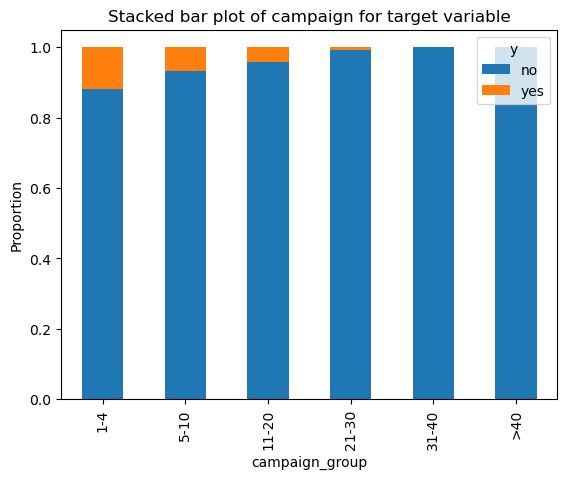

In [67]:
# Calculate the proportions for each category
prop_df_campaign = df.groupby(['campaign_group', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reorder the columns based on the campaign groups
prop_df_campaign = prop_df_campaign.reindex(campaign_groups)

# Plot the stacked barcode plot
prop_df_campaign.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of campaign for target variable')
plt.xlabel('campaign_group')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__  
* Based on the proportion of stacked barplots, customers tend to make deposits if they are contacted 1-4 times. This is make sense because it could be that the more often the customer is contacted will make the customer uncomfortable and discourage depositing.

#### Number of contacts performed before this campaign

In [68]:
previous_data = df['previous']
cross_tab_previous = pd.crosstab(previous_data, df['y'])
cross_tab_df_previous = pd.DataFrame(cross_tab_previous)
cross_tab_df_previous

y,no,yes
previous,,
0,32405,3140
1,3594,967
2,404,350
3,88,128
4,32,38
5,5,13
6,2,3
7,1,0


In [69]:
total_yes_previous = cross_tab_df_previous['yes']
percentage_previous = (total_yes_previous / total_yes_previous.sum()) * 100

percentage_previous = pd.DataFrame(percentage_previous)
percentage_previous['yes'] = percentage_previous['yes'].map('{:.2f}%'.format)
percentage_previous.index.name = 'previous'

percentage_previous

,yes
previous,
0,67.69%
1,20.85%
2,7.54%
3,2.76%
4,0.82%
5,0.28%
6,0.06%
7,0.00%


__Observation:__  
* Based on the cross tabulation, it can be seen that if there is no contact before the campaign is carried out, it has the highest contribution to customers who deposit, which is 67.69%. So it is recommended not to contact before the start of the marketing campaign.

#### Days Group

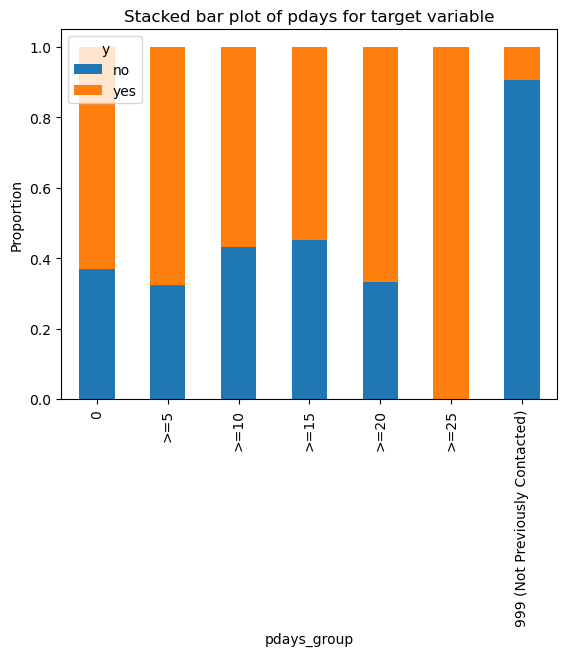

In [70]:
# Calculate the proportions for each category
prop_df_pdays = df.groupby(['pdays_group', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reorder the columns based on the pdays groups
prop_df_pdays = prop_df_pdays.reindex(pdays_groups)

# Plot the stacked barcode plot
prop_df_pdays.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of pdays for target variable')
plt.xlabel('pdays_group')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__  
* Based on the data, customers have a tendency to deposit if there is an interval of more than 25 days since the last contact. From this information, it is better for banks to give an interval of one month to re-contact customers who have the potential to make deposits. 

#### Contact communication type

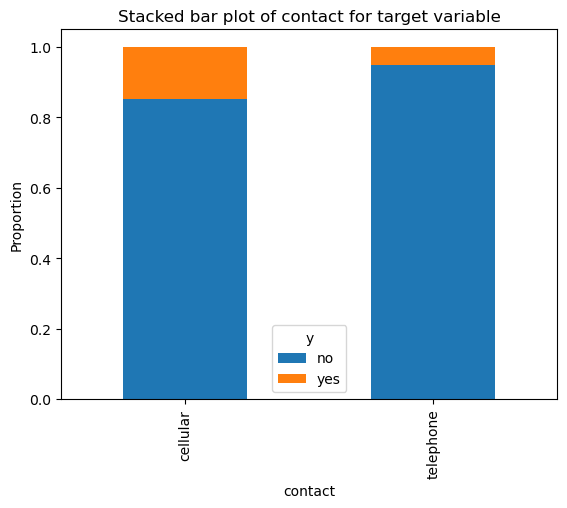

In [71]:
# Calculate the proportions for each category
prop_df_contact = df.groupby(['contact', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the stacked bar plot
prop_df_contact.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of contact for target variable')
plt.xlabel('contact')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__   
* When examined based on the medium used to contact prospective customers, it turns out that the proportion of depositor customers is more dominant if they were contacted using cellular.

### Data Analysis Using Time Features

#### Month

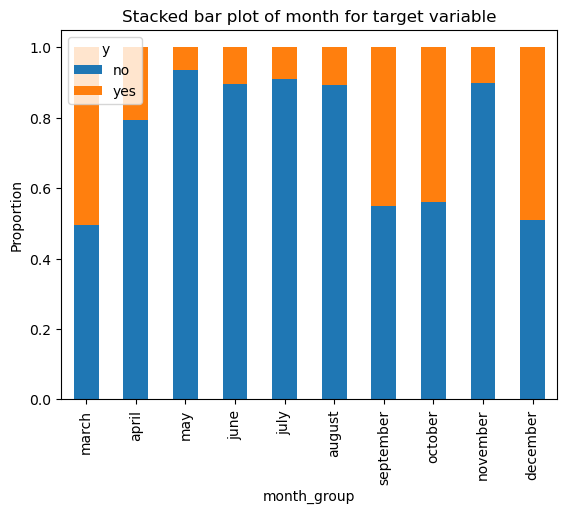

In [72]:
# Calculate the proportions for each category
prop_df_month = df.groupby(['month', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reorder the columns based on the month groups
prop_df_month = prop_df_month.reindex(month_order)

# Plot the stacked barcode plot
prop_df_month.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of month for target variable')
plt.xlabel('month_group')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__   
* Based on observations, there are months that are the last month customers were contacted which have a proportion of customers who tend to deposit, these months in particular include March, September, October, and December.

#### Day of Week

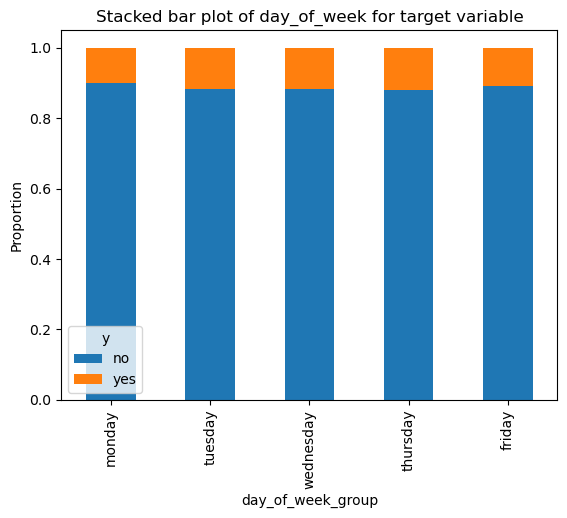

In [73]:
# Calculate the proportions for each category
prop_df_day_of_week = df.groupby(['day_of_week', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reorder the columns based on the day_of_week groups
prop_df_day_of_week = prop_df_day_of_week.reindex(day_order)

# Plot the stacked barcode plot
prop_df_day_of_week.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of day_of_week for target variable')
plt.xlabel('day_of_week_group')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

__Observation:__  
* The last day since the last customer was contacted within a weekday has a similar proportion of getting depositing customers.

### Previous Marketing Result

#### Poutcome

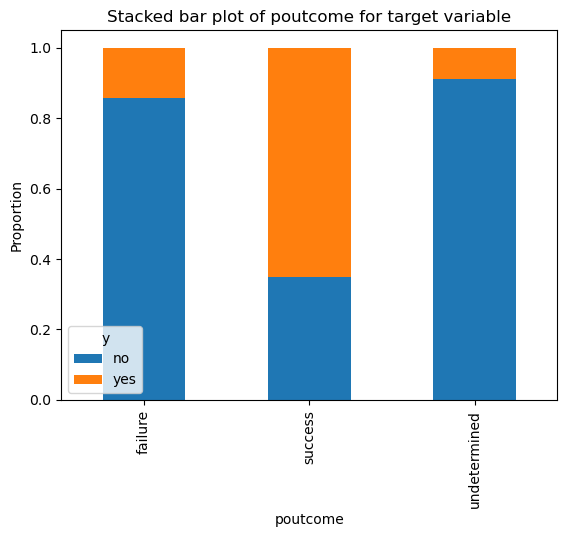

In [74]:
# Calculate the proportions for each category
prop_df_poutcome = df.groupby(['poutcome', 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the stacked bar plot
prop_df_poutcome.plot(kind='bar', stacked=True)

plt.title('Stacked bar plot of poutcome for target variable')
plt.xlabel('poutcome')
plt.ylabel('Proportion')
plt.legend(title='y')
plt.show()

In [75]:
poutcomes = df.groupby('poutcome')['y'].value_counts(normalize=False).unstack()
poutcomes_percentage = poutcomes.apply(lambda x: (x / x.sum()) * 100, axis=1)
poutcomes_percentage

y,no,yes
poutcome,,
failure,85.771402,14.228598
success,34.887109,65.112891
undetermined,91.166127,8.833873


In [76]:
poutcomes = df['poutcome']
cross_tab_df_poutcome = pd.crosstab(poutcomes, df['y'])
cross_tab_df_poutcome = pd.DataFrame(cross_tab_df_poutcome)
total_yes_poutcome = cross_tab_df_poutcome['yes']
percentage_poutcome = (total_yes_poutcome / total_yes_poutcome.sum()) * 100

percentage_poutcome = pd.DataFrame(percentage_poutcome)
percentage_poutcome['yes'] = percentage_poutcome['yes'].map('{:.2f}%'.format)
percentage_poutcome.index.name = 'poutcome'

percentage_poutcome

,yes
poutcome,
failure,13.04%
success,19.27%
undetermined,67.69%


__Observation:__  
* Based on the barplot and cross tabulation, it can be seen that there are 14.22% of customers who made deposits even though the previous marketing campaign was considered a failure to make deposits. Meanwhile, there are 34.88% of customers who are considered successful in making deposits in the previous marketing campaign but are no longer depositing. It should be noted to retain customers to still deposit in the future and there is still a possibility to attract customers who in the previous marketing campaign were considered a failure to deposit.
* Research can be carried out in the future to check what factors can make customers interested in depositing even though they were not interested before, and what things need to be done to retain customers.
* The undetermined category shows as a group that contributes more than 2/3 of customers who deposit in the poutcome feature, this shows a lot of incomplete information in the dataset, it would also be very useful if banks complete outcome data from previous marketing campaigns to confirm whether customers are considered failures or successes so that strategies can be formulated to retain customers and increase customers to deposit from more complete data.

# Preprocessing Machine Learning

In [77]:
# Feature Engineering
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler

# Model Selection
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import make_index_balanced_accuracy

`euribor3m` and `nr.employed` will be dropped as these two features are highly correlated with `emp.var.rate` which are both external factors. Dropping `euribor3m` and `nr.employed` will prevent feature redundancy in the dataset. While the `age_group` feature will be dropped because the feature with a more reliable continuous distribution for this numeric feature is represented by the `age` feature.

In [78]:
data_drop = ['euribor3m', 'nr.employed', 'age_group']
df = df.drop(data_drop, axis=1)

In [79]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,campaign_group,pdays_group
0,56,housemaid,married,primary_school,no,no,no,telephone,may,monday,261,0,undetermined,1.1,93.994,-36.4,no,1-4,999 (Not Previously Contacted)
1,57,services,married,secondary_school,not_available,no,no,telephone,may,monday,149,0,undetermined,1.1,93.994,-36.4,no,1-4,999 (Not Previously Contacted)
2,37,services,married,secondary_school,no,yes,no,telephone,may,monday,226,0,undetermined,1.1,93.994,-36.4,no,1-4,999 (Not Previously Contacted)
3,40,admin.,married,primary_school,no,no,no,telephone,may,monday,151,0,undetermined,1.1,93.994,-36.4,no,1-4,999 (Not Previously Contacted)
4,56,services,married,secondary_school,no,no,yes,telephone,may,monday,307,0,undetermined,1.1,93.994,-36.4,no,1-4,999 (Not Previously Contacted)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41170 non-null  int64   
 1   job             41170 non-null  object  
 2   marital         41170 non-null  object  
 3   education       41170 non-null  object  
 4   default         41170 non-null  object  
 5   housing         41170 non-null  object  
 6   loan            41170 non-null  object  
 7   contact         41170 non-null  object  
 8   month           41170 non-null  object  
 9   day_of_week     41170 non-null  object  
 10  duration        41170 non-null  int64   
 11  previous        41170 non-null  int64   
 12  poutcome        41170 non-null  object  
 13  emp.var.rate    41170 non-null  float64 
 14  cons.price.idx  41170 non-null  float64 
 15  cons.conf.idx   41170 non-null  float64 
 16  y               41170 non-null  object  
 17  campaign_gro

#### Encoding & Scaling

1. Convert the `job` feature/column using Binary Encoding, because this feature has a lot of unique data and has no order/not ordinal, if we use One Hot Encoding too many new features will be created, and if we use Ordinal/Label Encoding the results can be less suitable/less good. Therefore, we will try to use Binary Encoding instead.
2. Convert the `marital`, `default`, `housing`, `loan`, `contact`, and `outcome` feature/column using One Hot Encoding, because this feature has no order/not ordinal, and also the number of unique data is only few.
3. Changing the `education` feature/column using One Hot Encoding, because this feature although has an order, but because the duration of each `education` phase may not be the same, and we cannot figure out how long the customer's phase of education is, it will be safer and more accurate if we use One Hot Encoding, where the unique data is also only a little for this feature.
4. Transforming the `month` feature/column using Binary Encoding as there is no significant ordinal relationship between month, binary encoding can be a better choice as this feature has a lot of unique data.
5. Transforming the `day_of_week` feature/column using One Hot Encoding as there is no significant ordinal relationship between days, one hot can be a better choice.
6. Change the `campaign_group` feature/column using One Hot Encoding, because this feature although has an order/ordinal, the interval between `campaign_group` is not always the same length, so it will be safer and more accurate if we use One Hot Encoding, where the unique data is also relatively few for this feature.
7. Change the `pdays_group` feature/column using One Hot Encoding, because this feature even though it has an order, the unique value between `pdays_group` has one unique value whose interval is not the same, because there is a unique value 999 which represents the client was not previously contacted, it will be safer and more accurate if we use One Hot Encoding, where the unique data is also only a few for this feature.
8. Robust scaling is used in data transformation in Machine Learning when you want to overcome the impact of outliers and different scales in your data features. This method is especially useful if your data contains outliers that can affect standard normalization. Therefore, Robust Scaling is used to normalize numerical features `age`, `previous`, `duration`, `cons.price.idx`, `cons.conf.idx`, and `emp.var.rate`.

In [81]:
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['education','marital','housing', 'loan', 'contact', 'default', 'poutcome','day_of_week','campaign_group','pdays_group']),
    ('binary', ce.BinaryEncoder(), ['job', 'month']),
    ("Robust Scalling", RobustScaler(), ['age','previous', 'duration','cons.price.idx', 'cons.conf.idx', 'emp.var.rate'])
], remainder='passthrough')

In [82]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0}).astype(float)

In [83]:
counts = df['y'].value_counts()
print(counts)

0.0    36531
1.0     4639
Name: y, dtype: int64


#### Train Test Split

In [84]:
x = df.drop(columns=['y'])
y = df['y']

In [85]:
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [86]:
print(X_train.shape)
print(X_test.shape)

(32936, 18)
(8234, 18)


In [87]:
print(y_train.shape)
print(y_test.shape)

(32936,)
(8234,)


# Machine Learning Method

### Imbalance Treatment Using SMOTE Technique

The SMOTE (Synthetic Minority Over-sampling Technique) technique is used to overcome imbalance in the data. The SMOTE method involves selecting a reference sample from the minority class and creating a synthetic sample between the reference sample and its nearest neighbor. This synthetic sample is created by calculating the feature differences between the reference sample and its neighbors, then multiplying by a random factor and adding the result to the reference sample. The advantages of SMOTE include an increase in the number of minority samples, a reduction in the risk of overfitting with new variations, and improved model performance in predicting rarely occurring minority classes.

In [88]:
smote = SMOTE(random_state = 42)

In [89]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['education', 'marital', 'housing', 'loan',
                                  'contact', 'default', 'poutcome',
                                  'day_of_week', 'campaign_group',
                                  'pdays_group']),
                                ('binary', BinaryEncoder(), ['job', 'month']),
                                ('Robust Scalling', RobustScaler(),
                                 ['age', 'previous', 'duration',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'emp.var.rate'])])

In [90]:
X_train_pre = ct.fit_transform(X_train)
X_test_pre = ct.fit_transform(X_test)

In [91]:
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_pre, y_train)

In [92]:
pd.DataFrame(X_train_oversampled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.0,0.733333,0.000000,-0.078341,-0.331882,0.904762,0.093750
1,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.133333,0.000000,0.294931,0.779108,0.000000,0.093750
2,0.0,0.0,0.0,1.0,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.0,-0.066667,0.000000,0.152074,-0.331882,0.904762,0.093750
3,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0,0.466667,0.000000,-0.069124,0.266594,0.857143,0.000000
4,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.0,-0.600000,0.000000,0.465438,0.183896,-0.142857,0.093750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58445,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.968568,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.031432,1.000000,1.0,-0.049903,0.000000,2.603198,0.273606,0.851655,-0.021609
58446,0.0,0.0,0.0,1.0,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.639839,1.000000,0.0,1.000000,0.360161,1.0,-0.477398,1.639839,0.671244,0.176357,0.977069,-0.827465
58447,0.0,0.0,0.0,1.0,0.000000,0.0,0.742026,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257974,0.0,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.847342,1.742026,-0.305375,-1.196953,1.857143,-1.406250
58448,1.0,0.0,0.0,0.0,0.224622,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.224622,0.775378,1.000000,0.0,0.000000,1.000000,1.0,1.594672,0.000000,0.323297,0.138194,0.285714,-0.906250


In [93]:
pd.Series(y_train_oversampled).value_counts()

0.0    29225
1.0    29225
Name: y, dtype: int64

In [94]:
original_mean = np.mean(X_train_pre[y_train == 1], axis=0).round(2)
synthetic_mean = np.mean(X_train_oversampled[y_train_oversampled == 1], axis=0).round(2)

original_std = np.std(X_train_pre[y_train == 1], axis=0).round(2)
synthetic_std = np.std(X_train_oversampled[y_train_oversampled == 1], axis=0).round(2)

print(original_mean.shape)
print(synthetic_mean.shape)
print(original_std.shape)
print(synthetic_std.shape)

data_mean = {
    'Variable': range(1, len(original_mean) + 1),
    'Original Mean': original_mean,
    'Synthetic Mean': synthetic_mean
}

data_std = {
    'Variable': range(1, len(original_std) + 1),
    'Original Std': original_std,
    'Synthetic Std': synthetic_std
}

recap_mean = pd.DataFrame(data_mean)
recap_std = pd.DataFrame(data_std)

display(recap_mean, recap_std)

(42,)
(42,)
(42,)
(42,)


,Variable,Original Mean,Synthetic Mean
0,1,0.13,0.13
1,2,0.13,0.12
2,3,0.37,0.38
3,4,0.37,0.37
4,5,0.55,0.56
5,6,0.35,0.35
6,7,0.56,0.56
7,8,0.15,0.13
8,9,0.18,0.16
9,10,0.10,0.09


,Variable,Original Std,Synthetic Std
0,1,0.34,0.32
1,2,0.33,0.31
2,3,0.48,0.47
3,4,0.48,0.47
4,5,0.50,0.48
5,6,0.48,0.46
6,7,0.50,0.45
7,8,0.36,0.30
8,9,0.38,0.35
9,10,0.29,0.26


From this, it can be seen that for all the features used, none of the original and syntethic features from SMOTE have significantly different mean or standard deviation values, which validates that the syntethic data generated from SMOTE has successfully captured the characteristics of the original data accurately.

### Model Benchmarking

The selection of models implemented in machine learning modeling is a model that is a tree-based model to extract feature importance information in order to identify factors that influence prospective customers to deposit. 

In [95]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgb_rf = XGBRFClassifier()
lgbm = lgb.LGBMClassifier()

The dataset has a considerable difference between the amount of data for class 1 and 0, since the model will easily predict class 0, thus giving a high accuracy value, therefore that the accuracy metric cannot be used as the main metric because in this case, but still used as an additional metric for model quality preservation. Instead we will prioritize the use of ROC-AUC metric as the ROC-AUC metric is a value obtained by taking into account the true positive rate (TP / TP + FN) and false positive rate (FP / FP + TN) where the selection of this metrics is very suitable for the imbalanced dataset. **The ROC-AUC score that is closer to 1 means that the model is getting better at distinguishing the class 1 (customer makes a deposit) and 0 (customer does not make a deposit).**

For the metrics used in the classification report, there are precision, recall, and f1-score. Precision itself is the level of prediction acuity for class 1 or 0 where the higher the precision value, the greater the probability of correct prediction of the model when predicting class 1 or 0. Recall, is an evaluation metric in machine learning that measures how well a model is able to identify all positive instances in a dataset. If a model produces a Recall value close to 1, it indicates that the model has a very good ability to identify positive instances out of the total that actually exist. In the context of classification, a high Recall means that the model rarely misses positive instances (false negatives) and tends to detect most or even all positive instances. F1-Score takes the harmonic mean between Precision and Recall, which means it gives greater weight to the smallest value between the two. This is beneficial when we want to consider both Precision and Recall simultaneously without focusing only on one of them.

In this case, ROC-AUC will be used as the main metric where ROC-AUC evaluates the overall ability of the model to distinguish values 1 and 0, where other metrics namely precision, recall, f1-score, and accuracy will be used as additional metrics that serve to ensure the quality of the model and also determine the limitations of the model.

In [96]:
models = [dt , rf , gb, xgb, xgb_rf, lgbm]

for model in models:

    clf = Pipeline([
            ("Feature Transformation", ct),
            ("SMOTE", SMOTE(random_state=42)),
            (f"Model {type(model).__name__}", model)
        ])

    train_roc_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    clf.fit(X_train, y_train)
    test_prediction = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_prediction)
    test_roc_auc = roc_auc_score(y_test, test_prediction)

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, test_prediction)

    print(" ")
    print("Model: ", type(model).__name__)
    print("Train ROC-AUC: ", train_roc_auc.mean())
    print("Test Accuracy: ", test_accuracy)
    print("Test ROC-AUC: ", test_roc_auc)
    print("Classification Report:")
    print(classification_report(y_test, test_prediction))
    print("_________")

 
Model:  DecisionTreeClassifier
Train ROC-AUC:  0.7390631589212081
Test Accuracy:  0.8781880009715812
Test ROC-AUC:  0.7436856634131606
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      7306
         1.0       0.47      0.57      0.51       928

    accuracy                           0.88      8234
   macro avg       0.71      0.74      0.72      8234
weighted avg       0.89      0.88      0.88      8234

_________
 
Model:  RandomForestClassifier
Train ROC-AUC:  0.936053990555817
Test Accuracy:  0.9070925431139178
Test ROC-AUC:  0.7726732633546353
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      7306
         1.0       0.59      0.60      0.59       928

    accuracy                           0.91      8234
   macro avg       0.77      0.77      0.77      8234
weighted avg       0.91      0.91      0.91      8234

_________
 
Model

**Evaluation of Each Model**


**1. Decision Tree**

The decision tree model looks quite stable because the results of the ROC-AUC score on the train and test data are insignificant. However, the ROC-AUC score is still relatively lower than the gradient boosting, XGBRF, and LGBM models. The precision value of the decision tree model to predict class 1 is still very low, which means that the model still has many errors in predicting the minority class.

**2. Random Forest**

The random forest model has a significant difference in ROC-AUC score results on train and test data making this model fairly unstable, therefore it will not be considered further.

**3. Gradient Boosting**

The gradient boosting model has a difference in ROC-AUC score results on train and test data that is not so different, therefore this model is fairly stable. This model has the second highest f-1 score after LGBM. The weakness of this model is that the value of precision for predicting class 1 is still fairly low, indicating that there are still many prediction errors for minority classes, because it is helped by the high recall score this model produces an f-1 score that shows a fairly good balance between Precision and Recall.

**4. Extreme Gradient Boosting**

The Extreme Gradient Boosting model has a significant difference in ROC-AUC score results on train and test data making this model fairly unstable, therefore it will not be considered further.

**5. Extreme Gradient Boosting - Random Forest**

XGBRF model has a difference in ROC-AUC score results on train and test data that is not so different, similar to the gradient boosting model, so this model is quite stable. This model has a lower f-1 score than the gradient boosting model. The weakness of this model is that the value of precision for predicting class 1 is still fairly low, indicating that there are still many prediction errors for minority classes, because it is helped by the considerably high recall score, this model produces an f-1 score that shows a fairly good balance between Precision and Recall.

**6. Light Gradient Boosting Machine**

The LGBM model has a significant difference in the ROC-AUC score on the train and test data so that this model is considered unstable, despite the ROC-AUC score on the train and test data is quite high. This model has the highest f-1 score compared to other models. Due to the instability of the model, this model will not be considered for further optimization.

**Model Selection**

There are three models that are quite stable, namely decision tree, gradient boosting, XGBRF. Decision tree will not be selected for optimization because its ROC-AUC score is lower than gradient boosting and XGBRF models. The two models have similar characteristics, but XGBRF has a lower f-1 score and accuracy than gradient boosting, so the model chosen for optimization is the **gradient boosting** model.

### Hyperparameter Tuning

In [97]:
gb = GradientBoostingClassifier(random_state=42)

In [98]:
pipe = Pipeline([
    ("Feature Transformation", ct),
    ("SMOTE", SMOTE(random_state=42)),
    ("Model", gb)
])

Some of the hyperparameters commonly used in tuning gradient boosting model include:

- Model__learning_rate: This hyperparameter controls the extent to which each model generated in the boosting process affects the overall model. A lower learning rate usually results in a more stable and slower converging model, while a higher learning rate can speed up convergence but also increases the risk of overfitting.

- Model__n_estimators: This hyperparameter sets how many models will be used to generate the final prediction. Using more estimators can improve model performance, but it can also take more computational time.

- Model__max_depth: controls the maximum depth of the decision tree in Gradient Boosting. Increasing max_depth can increase the complexity of the model, allowing it to learn more complex relations in the training data. However, too high a max_depth can lead to overfitting.

- Model__min_samples_split: specifies the minimum number of samples required to split a node. If the number of samples at a node does not reach this threshold, the node will not be split further. Using a higher value for this hyperparameter can result in a simpler tree and reduce the risk of overfitting.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.617 total time=  16.4s
[CV 2/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.619 total time=  17.7s
[CV 3/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.618 total time=  16.8s
[CV 4/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.626 total time=  18.5s
[CV 5/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.616 total time=  18.5s
[CV 1/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=150;, score=0.630 total time=  25.7s
[CV 2/5] END Model__learning_rate=0.1, Model__max_depth=3, Model__min_samp

[CV 3/5] END Model__learning_rate=0.1, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.618 total time=  43.8s
[CV 4/5] END Model__learning_rate=0.1, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.630 total time=  42.0s
[CV 5/5] END Model__learning_rate=0.1, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.624 total time=  42.7s
[CV 1/5] END Model__learning_rate=0.05, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.586 total time=  17.5s
[CV 2/5] END Model__learning_rate=0.05, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.604 total time=  41.6s
[CV 3/5] END Model__learning_rate=0.05, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.591 total time=  23.3s
[CV 4/5] END Model__learning_rate=0.05, Model__max_depth=3, Model__min_samples_split=2, Model__n_estimators=100;, score=0.605 total t

[CV 5/5] END Model__learning_rate=0.05, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=150;, score=0.625 total time=  31.6s
[CV 1/5] END Model__learning_rate=0.05, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.626 total time=  43.0s
[CV 2/5] END Model__learning_rate=0.05, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.628 total time=  41.4s
[CV 3/5] END Model__learning_rate=0.05, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.621 total time=  42.9s
[CV 4/5] END Model__learning_rate=0.05, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.632 total time=  42.8s
[CV 5/5] END Model__learning_rate=0.05, Model__max_depth=4, Model__min_samples_split=4, Model__n_estimators=200;, score=0.620 total time=  41.8s
Best Parameter Feature Selection F1-Score: 0.6255924170616114
Best Parameter Hyperparameter Tuning : {'Model__learning_rate': 0.1,

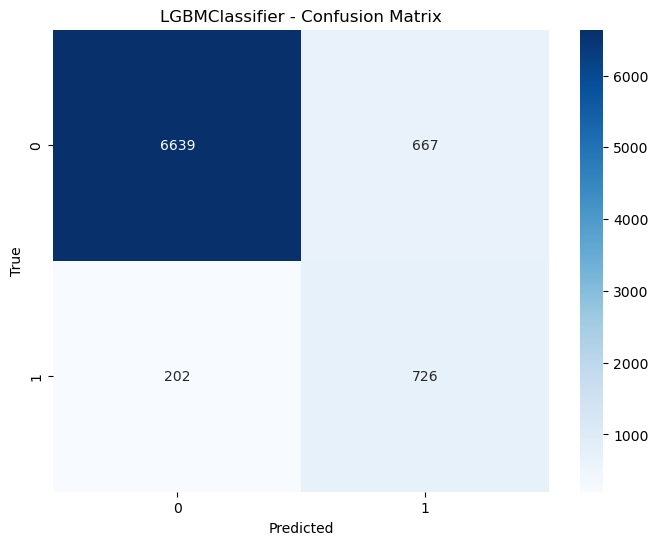

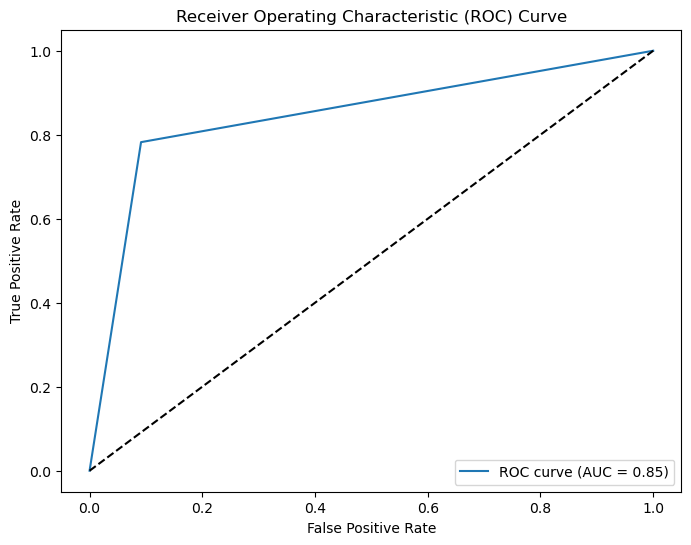

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      7306
         1.0       0.52      0.78      0.63       928

    accuracy                           0.89      8234
   macro avg       0.75      0.85      0.78      8234
weighted avg       0.92      0.89      0.90      8234



In [99]:
param_grid = {
    'Model__learning_rate': [0.1, 0.05],
    'Model__n_estimators': [100, 150, 200],
    'Model__max_depth': [3, 4],
    'Model__min_samples_split': [2, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1', verbose=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_ens = grid_search.best_estimator_

# Perform predictions on the test set using the best model
y_pred = best_ens.predict(X_test)

test_f1 = f1_score(y_test, y_pred)
print(f"Best Parameter Feature Selection F1-Score:", test_f1)
print(f"Best Parameter Hyperparameter Tuning :", grid_search.best_params_)
test_precision = precision_score(y_test, y_pred)
print(f"Best Parameter Hyperparameter Tuning Precision:", test_precision)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameter Hyperparameter Tuning Test Accuracy:", test_accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"{type(model).__name__} - Confusion Matrix")
plt.show()

test_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier curve (diagonal dashed line)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

The results of the tuning process for the gradient boosting model improved the performance of the model although slightly. Although the ROC-AUC score remains but there is an increase in f-1 score from 0.61 to 0.63. When viewed from other metrics, recall has decreased but there is an increase in precision score for class 1 prediction. This is a positive improvement because the model becomes better at predicting minority classes. The tuning process also improved the accuracy from 0.88 to 0.89.

### Feature Importances

In [100]:
selected_features = []
for transformer_name, transformer, columns in best_ens.named_steps['Feature Transformation'].transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        if transformer_name == 'Binary Encoding':
            feature_names = ['x'+name for name in transformer.get_feature_names_out()]
        else:
            feature_names = transformer.get_feature_names_out()
        selected_features.extend(feature_names)
    else:
        selected_features.extend(columns)
importance_df = pd.DataFrame({'Feature': selected_features})
feature_importances = best_ens.named_steps['Model'].feature_importances_
importance_df['Importance'] = feature_importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

,Feature,Importance
38,duration,0.546294
41,emp.var.rate,0.175894
40,cons.conf.idx,0.064584
32,month_0,0.021106
6,housing_yes,0.017712
39,cons.price.idx,0.017530
11,poutcome_success,0.016313
9,default_not_available,0.015539
8,contact_telephone,0.013470
31,job_3,0.011998


__Observation:__

for feature importance with a score above 1%
* When viewed, it turns out that external conditions are factors that influence prospective customers to deposit, seen with the considerably high score on the `duration`and`emp.var.rate` followed by `cons.conf.idx` and `cons.price.idx`.

* Apparently there is a binary-encoded month-feature and job-feature that influences customers to deposit.

* When viewed from the score feature of importance on poutcome_success which turns out to be quite influential on prospective customers to deposit, this could be related to the quality of deposit products offered by banks that can influence customers' decisions to reinvest. The positive experience of previous deposits triggered by the first marketing campaign makes prospective customers see the potential of previous investments, so they tend to feel confident and comfortable to make deposits again.

* It turns out that prospective customers who own a house are enough to influence them to make deposits.

* For the case of default_not_available as a feature importance that has a score above 1%, we will ignore this because not_available on the `default` feature is the absence of information from customers whether they are defaulted or not.

* Apparently, contacting prospective customers using telephone is one of the factors that can make prospective customers to deposit. This is interesting because it contradicts the findings of data analytics where prospective customers are more likely to deposit if contacted by cellular.

* It turns out that the condition of prospective customers who have loans is quite influential on customers to make deposits 

# Business Implementation

Based on the classification report results of our model, we can conclude that if we later use our model to filter the list of candidates that we will try to offer, then our model can reduce 91% (recall class 0) of uninterested candidates for us not to approach, and our model can get 78% (recall class 1) of interested candidates from all interested candidates. (all of this is based on recall)

Our model has a prediction of interested candidates of 52% (precision class 1), so every time our model predicts that a candidate is interested, the probability of guessing correctly is 52% or so. So there will still be candidates who are not actually interested but are predicted as interested candidates about 9% (the result of subtracting 1-recall class 0 in %) of the overall candidates who are not interested (based on recall).

If the cost to reach out per candidate is $ 5 and if the number of candidates we have for a period of time is 20,000 (of which 10,000 are interested, and 10,000 are not interested), then the calculation would be something like this:

No Models (all candidates we check and offer):

    Total Cost => 20,000 x 5 USD = 100,000 USD
    Total Interested Candidates acquired => 10,000 people (because we offered them all)
    Total Not Interested Candidates not obtained => 0 people (because we offered them all)
    Wasted cost => 10,000 x 5 USD = 50,000 USD (because 10,000 people rejected and became useless)
    Total savings => 0 USD

With the Model (only candidates predicted by the model are interested that we check and offer):

    Total Cost => (7800 x 5 USD) + (900 x 5 USD) = 39,000 USD + 4,500 USD = 43,500 USD
    Total Interested Candidates obtained => 7800 people (because the recall of 1/interested is 78%)
    Total Interested Candidates not obtained => 2200 people (because recall 1/interested is 78%)
    Wasted cost => 900 x 5 USD = 4500 USD (based on recall 0/not interested (10 people rejected the offer/not interested))
    Total savings => 9100 x 5 USD = 45,500 USD (only those who are not interested are counted, those who are interested but not offered are not counted here)
    
    Suppose the capital for marketing strategy is 100,000 USD, while the total cost to attract potential customers is 43,500 USD and the savings is 45,500 USD. Based on this information, it means:
    
    (100,000 - 43,500) USD = 56,500 USD, where 45,500 USD is saved from the remaining 56,500 USD.
    
    So the bank has a reduced operational marketing cost percentage of 45.5% and saving 56.5% from the campaign allocation.

Based on the example calculation, it can be seen that by using our model, the company will save considerable costs without sacrificing too many potential candidates/interested candidates.

# Conclusion and Recommendation

### Conclusion

#### Data Analytics

* Customers who are still students and are under 26 years old and customers who are retired and aged 70 years and over tend to make deposits.
* Customers who have no study certificate tend to be dominant in making deposits.
* Single customers show higher deposit propensity compared to married or divorced individuals
* Homeowners and non-homeowners appear to have the same propensity to deposit.
* Customers who have loans and do not have loans appear to have the same tendency to deposit.
* Customers who are not defaulted tend to be more interested in depositing.
* The observed marketing technique has the highest number of customers who make deposits ranging from 1-4 contacts.
* It can be seen that if there is no contact before the campaign is carried out, the results show a dominant result in customers who make a deposit.
* Customers have a tendency to deposit if there is an interval of more than 25 days since the last contact.
* The proportion of depositor customers is more dominant if they were contacted using cellular.
* There are months that are the last month customers were contacted which have a proportion of customers who tend to deposit, these months in particular include March, September, October, and December.
* There are 14.22% of customers who made deposits even though the previous marketing campaign was considered a failure to make deposits. Meanwhile, there are 34.88% of customers who are considered successful in making deposits in the previous marketing campaign but are no longer depositing.

#### Machine Learning

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      7306
         1.0       0.52      0.78      0.63       928

    accuracy                           0.89      8234
   macro avg       0.75      0.85      0.78      8234
weighted avg       0.92      0.89      0.90      8234



In [102]:
print('Tuned Model ROC-AUC:',test_roc_auc) 

Tuned Model ROC-AUC: 0.8455163800183128


* From the evaluation results for the best model chosen is GradientBoostingClassifier. 

* The treatment to overcome data imbalance with SMOTE technique and hyperparameter tuning has successfully improved the performance of the GradientBoostingClassifier model.

* Our model has a prediction accuracy of prospective customers who deposit 52% (precision), so every time our model predicts that a prospective customer to deposit, the probability of guessing is correct is 52% or less. The 52% for predicting class 1 from imbalanced data indicates the weakness of the model, because it still makes a lot of minority class prediction errors.

* It turns out that the factors that most influence customers to deposit are external things that cannot be anticipated by banks, although there are still some factors that banks can actually handle.

* If the marketing campaign allocation is 100,000 USD to target 20,000 potential customers, with the machine learning model the bank needs to prepare an operational cost of 43,500 USD which will save 56.5% of the funds for the marketing campaign.

### Recommendation

  **Recommended action**
  
  * To increase the number of potential customers to deposit which will increase revenue to the bank, the bank should make contact with potential customers according to the personal characteristics of the customer. Based on the consideration of the data analysis, the characteristics of potential customers are those who are in the age range below 26 years and above 70 years, are students and retirees, are not in default, and if based on the results of the evaluation of feature importance, potential customers are those who own a house and have a loan.

  * To enhance the success in getting customers who deposit banks need to contact 1-4 times recommended using cellular, and need to have an interval of one month if the first contact is not successful, as for contacting it should be done in March, September, October, and December because most customers have a tendency to deposit if last contacted in these months. There should be no need for contacting before the marketing campaign. Banks can also try to re-contact customers who previously did not deposit in the previous marketing campaign, because there are 14.22% of customers who were previously considered unsuccessful finally made deposits afterwards.
  
  * If seen from the personal characteristics of customers, the bank should offer the benefits of deposits such as interest or investment programmes for students or prospective customers who are still in the early career stage as a facility to provide additional income to them. As for the benefits that can be offered to potential customers above 70 years old, offering a higher deposit rate than the usual, especially for customers aged 70 years and above and retired, can be a great incentive for those who are looking for ways to optimise their savings.
  
  **Possible future research**
  
  * In the future, further analysis can be carried out regarding what factors make customers who were initially not interested in depositing during the previous marketing campaign until they become interested in depositing.

  **Complete the dataset**

  * The need to update the database, especially for the default and poutcome features to increase data validity because there are still customers who do not reveal whether they are default or not and to ascertain whether the customer was previously considered a failure or success after receiving a previous marketing campaign.

  * The addition of new features to the dataset that can be related to the interest of prospective customers to make deposits, for example, such as deposit interest data, will help marketing strategies to offer concrete benefits to prospective customers to get more customers.